# Antes de empezar :
   - Estos ejercicios están relacionados con las lecciones Subconjunto y Estadísticas descriptivas.
   - Tenga en cuenta que necesitará utilizar algunas de las funciones que aprendió en las lecciones anteriores.
   - Todos los conjuntos de datos se proporcionan en la carpeta `your-code` de este laboratorio.
   - Elabora tus códigos y resultados tanto como puedas.
   - Esfuérzate al máximo para responder a las preguntas y completar las tareas y, sobre todo, ¡¡¡disfruta del proceso!!!

#### Importa todas las librerías necesarias

In [68]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Desafío 1

#### En este reto utilizaremos el archivo `Temp_States.csv`. 

#### Primero impórtalo en un marco de datos llamado `temp`.

In [69]:
# YOUR CODE HERE
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [70]:
# your solution here
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore los tipos de datos del marco de datos Temp. ¿Qué tipo de datos tenemos? Comenta tu resultado.

In [71]:
# YOUR CODE HERE
print("\nTipos de datos del DataFrame temp:")
print(temp.dtypes)


Tipos de datos del DataFrame temp:
City            object
State           object
Temperature    float64
dtype: object


#### Selecciona las filas en las que el estado es New York

In [72]:
# YOUR CODE HERE
ny_temp = temp[temp['State'] == 'New York']['Temperature']
ny_temp

0    19.444444
1     9.444444
2     3.333333
Name: Temperature, dtype: float64

#### ¿Cuál es la temperatura media de las ciudades de Nueva York?

In [73]:
# YOUR CODE HERE
ny_temp_mean = temp[temp['State'] == 'New York']['Temperature'].mean()
ny_temp_mean

10.74074074074074

#### Queremos conocer las ciudades y estados con temperaturas superiores a 15 grados centígrados.

In [74]:
# your answer here
cities_states_15 = temp[temp['Temperature'] > 15]
cities_states_15

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Ahora, devuelva sólo las ciudades que tengan una temperatura superior a 15 grados centígrados.

In [75]:
# YOUR CODE HERE
cities_above_15 = cities_states_15[['City']]
cities_above_15

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### Queremos saber qué ciudades tienen una temperatura superior a 15 grados Celcius e inferior a 20 grados Celcius

*Pista: Primero escriba la condición y luego seleccione las filas.

In [76]:
# YOUR CODE HERE
cities_between_15_and_20 = temp[(temp['Temperature'] > 15) & (temp['Temperature'] < 20)]
cities_between_15_and_20

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Halla la media y la desviación estándar de la temperatura de cada estado.

*Pista: Utiliza las funciones de la lección Manipulación de datos*.

In [77]:
# YOUR CODE HERE
state_temp_stats = temp.groupby('State')['Temperature'].agg(['mean', 'std']).reset_index()
state_temp_stats

,State,mean,std
0,Connecticut,15.833333,1.964186
1,New Jersey,21.111111,1.571348
2,New York,10.740741,8.133404


# Desafío 2

#### Cargar el fichero `employee.csv` en un DataFrame. Llama al dataframe `employee`.

In [78]:
# YOUR CODE HERE
employee = pd.read_csv('Employee.csv')

#### Explore los tipos de datos del marco de datos Temp. Comenta tus resultados

In [79]:
# YOUR CODE HERE
print(employee.dtypes)

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object


#### Muestre visualmente la distribución de frecuencias (histograma) del conjunto de datos de empleados. Describa en pocas palabras estos histogramas.

Text(0.5, 1.0, 'Distribución de Salarios')

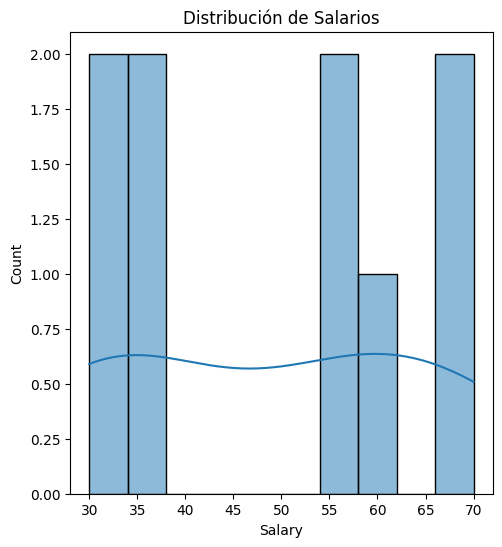

In [80]:
# your answer here
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(employee['Salary'], bins=10, kde=True)
plt.title('Distribución de Salarios')

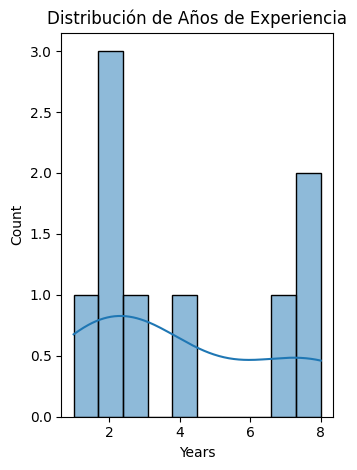

In [81]:
# YOUR CODE HERE
plt.subplot(1, 2, 2)
sns.histplot(employee['Years'], bins=10, kde=True)
plt.title('Distribución de Años de Experiencia')
plt.tight_layout()
plt.show()

#### ¿Cuál es el salario medio en esta empresa?

In [82]:
# YOUR CODE HERE
salary_mean = employee['Salary'].mean()
salary_mean

48.888888888888886

#### ¿Cuál es el salario más alto?

In [83]:
# YOUR CODE HERE
salary_max = employee['Salary'].max()
salary_max

70

#### ¿Cuál es el salario más bajo?

In [84]:
# YOUR CODE HERE
salary_min = employee['Salary'].min()
salary_min

30

#### ¿Quiénes son los empleados con el salario más bajo?

In [85]:
# YOUR CODE HERE
lowest_salary = employee.sort_values(by='Salary',ascending=True)
lowest_salary.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
0,Jose,IT,Bachelor,M,analyst,1,35


In [86]:
#o solo nombre y salario
lowest = lowest_salary[['Name', 'Salary']]
lowest.head(3)

,Name,Salary
1,Maria,30
2,David,30
0,Jose,35


#### ¿Podría darnos toda la información sobre un empleado llamado David?

In [87]:
# YOUR CODE HERE
david_info = employee[employee['Name'] == 'David']
david_info

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### ¿Podría dar sólo el sueldo de David?

In [88]:
# YOUR CODE HERE
david_salary = david_info['Salary'].values[0]
david_salary

30

#### Printea todas las líneas en las que el cargo es asociado

In [89]:
# YOUR CODE HERE
associates_info = employee[employee['Title'] == 'associate']
associates_info

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Printea las 3 primeras filas de tu dataframe

##### Consejo : Hay 2 maneras de hacerlo. Hazlo de las dos maneras

In [90]:
# YOUR CODE HERE
first_three_rows_1 = employee.head(3)
first_three_rows_1

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [91]:
# YOUR CODE HERE
first_three_rows_2 = employee.iloc[:3]
first_three_rows_2

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### ¿Encuentra a los empleados cuyo cargo es asociado y cuyo salario es superior a 55?

In [92]:
# YOUR CODE HERE
high_salary_associates = employee[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]
high_salary_associates

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Agrupa a los empleados en función del número de años que llevan trabajando. ¿Cuáles son los salarios medios de cada grupo?

In [93]:
# YOUR CODE HERE
salary_by_years = employee.groupby('Years')['Salary'].mean().reset_index()
salary_by_years

,Years,Salary
0,1,35.000000
1,2,38.333333
2,3,55.000000
3,4,35.000000
4,7,60.000000
5,8,70.000000


#### ¿Cuál es el salario medio por título?

In [94]:
# YOUR CODE HERE
salary_by_title = employee.groupby('Title')['Salary'].mean().reset_index()
salary_by_title

,Title,Salary
0,VP,70.000000
1,analyst,32.500000
2,associate,56.666667


#### Muestra un resumen visual de los datos utilizando boxplot. ¿Cuáles son los cuartiles primero y tercero? Comenta tus resultados.

* Pista : Cuantiles vs Cuartiles*.
En Probabilidad y Estadística, los cuantiles son puntos de corte que dividen el rango de una distribución de probabilidad en intervalos continuos con probabilidades iguales. Cuando la división es en cuatro partes, los valores de la variable correspondientes al 25%, 50% y 75% de la distribución total se denominan cuartiles.

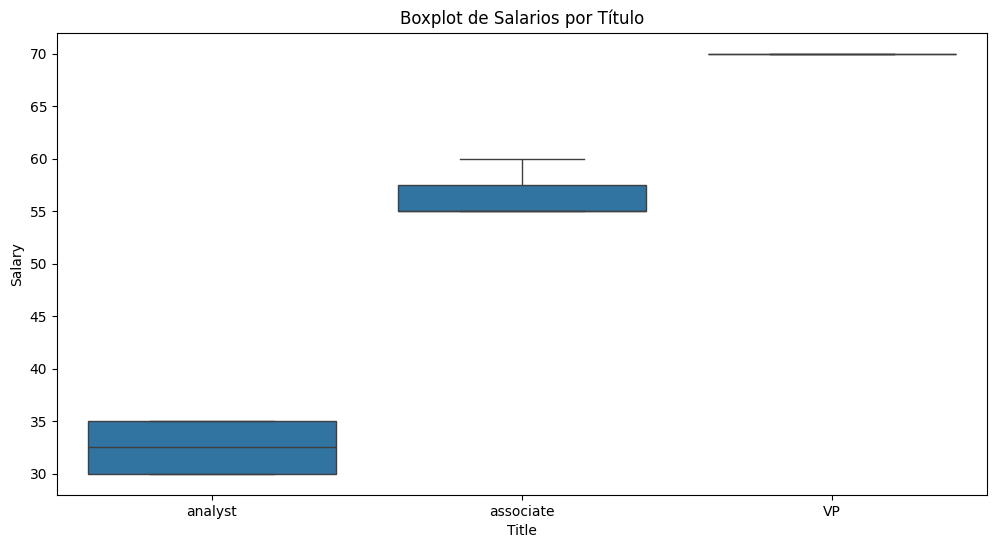

In [95]:
# YOUR CODE HERE
plt.figure(figsize=(12, 6))
sns.boxplot(x='Title', y='Salary', data=employee)
plt.title('Boxplot de Salarios por Título')
plt.show()

In [96]:
# print first quartile here
q1 = employee['Salary'].quantile(0.25)
q1

35.0

In [97]:
# print third quartile here
q3 = employee['Salary'].quantile(0.75)
q3

60.0

#### ¿Es diferente el salario medio por género?

In [98]:
# your answer here
salary_by_gender = employee.groupby('Gender')['Salary'].mean().reset_index()
salary_by_gender

,Gender,Salary
0,F,47.5
1,M,50.0


#### Encuentra el mínimo, la media y el máximo de todas las columnas numéricas para cada Departamento.

##### Sugerencia: Utiliza las funciones de la lección Manipulación de Datos

In [99]:
# your answer here
dept_stats = employee.groupby('Department').agg({
    'Years': ['min', 'mean', 'max'],
    'Salary': ['min', 'mean', 'max']
}).reset_index()
dept_stats

Department Years               Salary           
               min      mean max    min   mean max
0         HR     2  4.666667   8     30  45.00  70
1         IT     1  4.500000   8     30  48.75  70
2      Sales     2  2.500000   3     55  55.00  55

### Pregunta bonus

#### Para cada departamento, calcule la diferencia entre el salario máximo y el salario mínimo.

##### * Sugerencia: pruebe a utilizar `agg` o `apply` y `lambda`*.

In [100]:
# your answer here
salary_diff_by_dept = employee.groupby('Department')['Salary'].agg(lambda x: x.max() - x.min()).reset_index()
salary_diff_by_dept.columns = ['Department', 'Salary Range']
salary_diff_by_dept

,Department,Salary Range
0,HR,40
1,IT,40
2,Sales,0


# Desafío 3

#### Abra el conjunto de datos Orders.csv. Nombre el conjunto de datos pedidos

In [101]:
# your answer here
orders_df = pd.read_csv('Orders.csv')

#### Explore su conjunto de datos observando los tipos de datos y las estadísticas de resumen. Comenta tus resultados

In [102]:
# your answer here


In [103]:
# your answer here

#### ¿Cuál es el precio medio de compra?

In [104]:
# your answer here

#### ¿Cuáles fueron los precios de compra más altos y más bajos? 

In [105]:
# your answer here

In [106]:
# your answer here

#### Seleccione todos los clientes que tenemos en España

In [107]:
# your answer here

#### ¿Cuántos clientes tenemos en España?
##### Pista : Utiliza value_counts()

In [108]:
# your answer here

#### Selecciona todos los clientes que han comprado más de 50 artículos ?

In [109]:
# your answer here

#### Selecciona pedidos de España superiores a 50 artículos

In [110]:
# your answer here

#### Seleccionar todos los pedidos gratuitos

In [111]:
# your answer here

#### Seleccionar todos los pedidos que sean 'lunch bag
#### Pista: Utilice las funciones de cadena

In [112]:
# your answer here

#### Seleccione todos los pedidos realizados en 2011 y que sean «lunch bag».  

In [113]:
# your answer here

#### Muestra la distribución de frecuencias del importe gastado en España.

In [114]:
# your answer here

#### Seleccione todos los pedidos realizados en el mes de agosto

In [115]:
# your answer here

#### Seleccione cuántos pedidos se realizan por países en el mes de agosto
##### Pista: Utilice value_counts()

In [116]:
# your answer here

#### ¿Cuál es el gasto medio por país?

In [117]:
# your answer here

#### ¿Cuál es el artículo más caro?

In [118]:
# your answer here

#### ¿Cuál fue la cantidad media gastada al año?

In [119]:
# your answer here